market adjusted Cumulative Abnormal Returns: 
Do sectors experience persistent gains or losses following AI releases, rather than just short-lived daily reactions?

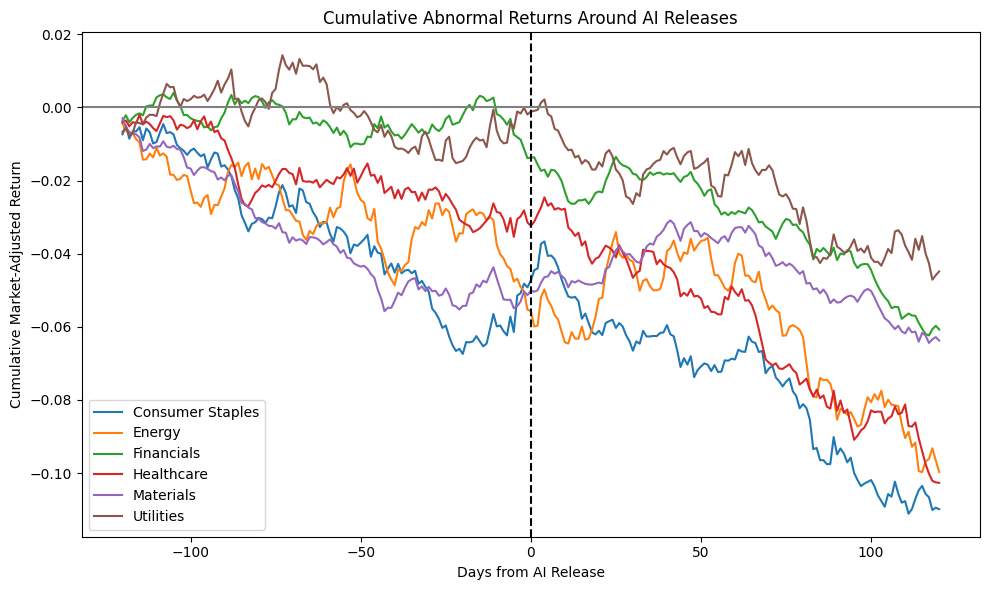

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("ai_event_study_sector_specific_market_adjusted.csv")

car = (
    df.groupby(["sector", "days_from_event"])["market_adj_return"]
    .mean()
    .groupby(level=0)
    .cumsum()
)

car_df = car.unstack(0)

plt.figure(figsize=(10,6))
for col in car_df.columns:
    plt.plot(car_df.index, car_df[col], label=col)

plt.axvline(0, color="black", linestyle="--")
plt.axhline(0, color="gray")
plt.title("Cumulative Abnormal Returns Around AI Releases")
plt.xlabel("Days from AI Release")
plt.ylabel("Cumulative Market-Adjusted Return")
plt.legend()
plt.tight_layout()
plt.show()